<a href="https://colab.research.google.com/github/Hohana/SVM/blob/main/SVM_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clone repository

In [1]:
!git clone https://github.com/Hohana/SVM.git


Cloning into 'SVM'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (318/318), done.
remote: Compressing objects: 100% (312/312), done.
remote: Total 318 (delta 45), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (318/318), 17.32 MiB | 10.54 MiB/s, done.
Resolving deltas: 100% (45/45), done.


#Breast Cancer Winsconsing Data

In this project, we use SVM (Support Vector Machines) to build and train a model using breast cancer records, and classify the data in benign or malignant. We also compare the performances of regression models and SVM for this classification case.

##Importing libraries

In [ ]:
#for loading data and for performing data analysis operations on it
import pandas as pd
import numpy as np

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

#for PCA (feature engineering)
from sklearn.decomposition import PCA

#for data scaling
from sklearn.preprocessing import StandardScaler

#for encoding and splitting dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#for fitting Logistic Regression and SVM model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#for displaying evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

#for file operations
import os

print("All required libraries loaded!")

All required libraries loaded!


##Look at the dataset

Attribute Information:
*   ID number
*   Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1.   radius (mean of distances from center to points on the perimeter)
2.   texture (standard deviation of gray-scale values)
3.   perimeter
4.   area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

Check the target variables

*   Malignant = 1 (indicates prescence of cancer cells)
*   Benign = 0 (indicates abscence)

In [ ]:
#load dataset into pandas dataframe
df = pd.read_csv("/content/SVM/breast-cancer-wisconsin-data/data.csv")
df.shape

(569, 33)

In [ ]:
#check the data types of all the attributes loaded into the dataframe
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
Unnamed: 32                float64
dtype: object

In [ ]:
#see first few rows of the data loaded
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
#see last few rows of the data loaded
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [ ]:
#how many Benign and Malignant do we have in our dataset?
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

##Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Basic statistical details

In [ ]:
#describing the dataset

df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

Checking for missing values
* Machine Learning algorithm generally, cannot work with missing values, so
before we launch a machine learning algorithm we must cleaning the dataset, we will remove the features that doesn't affect the model

In [ ]:
#Checking for missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [ ]:
# Deleting the id and Unnamed column

df= df.drop(['Unnamed: 32','id'],axis=1)

Checking for the correlation

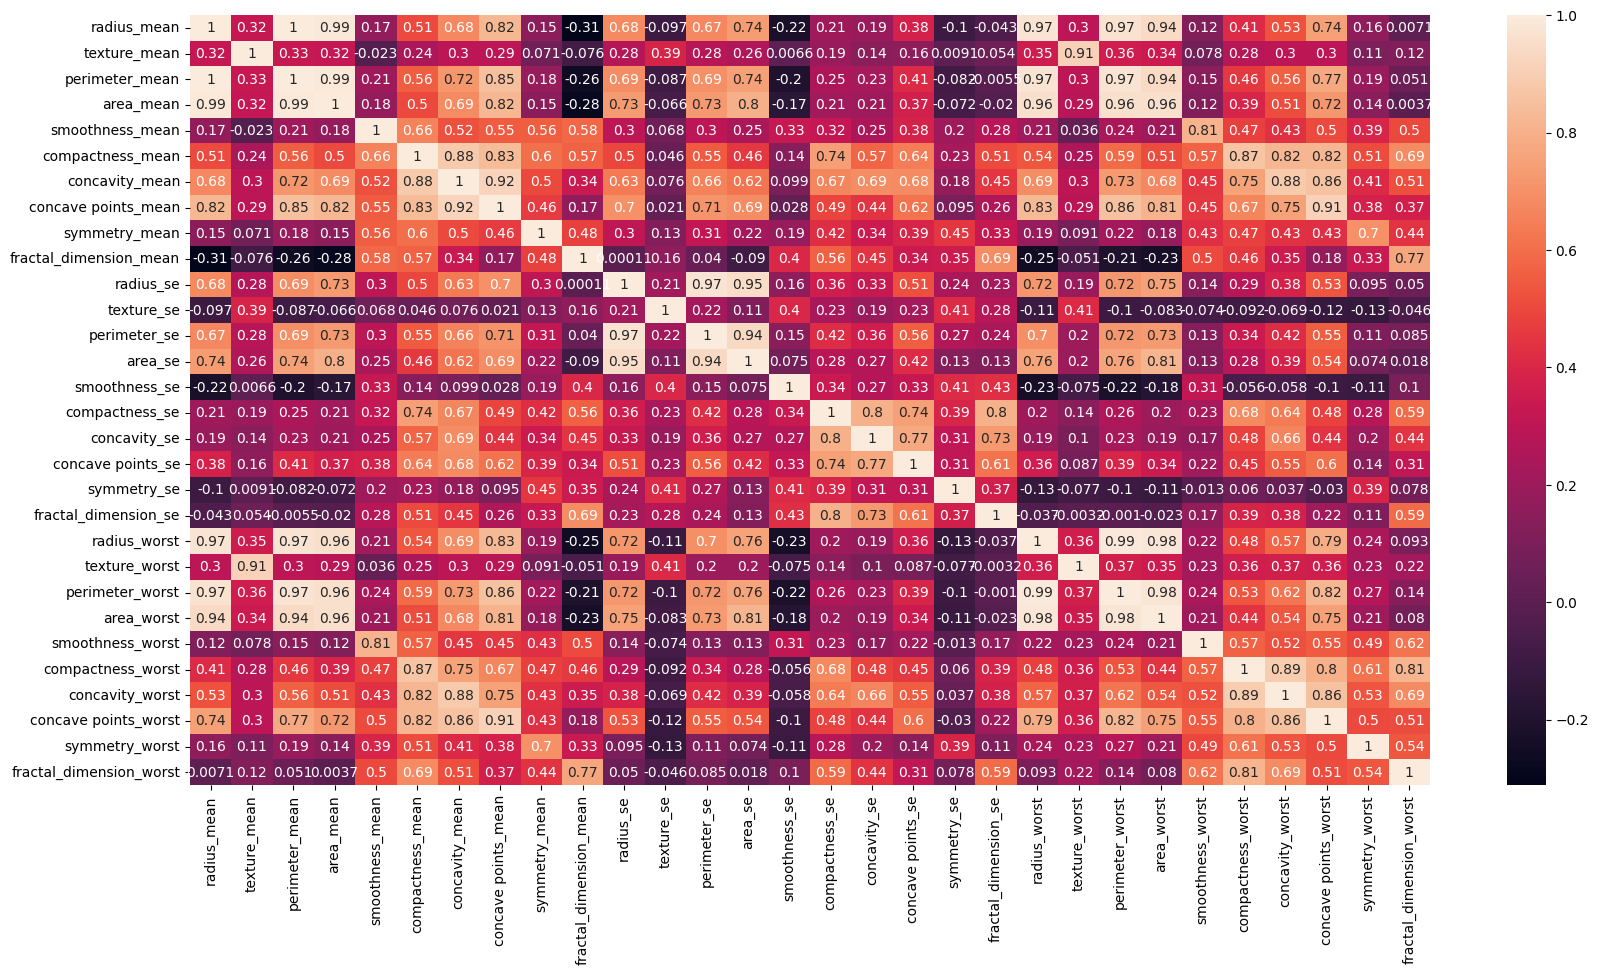

In [ ]:
plt.figure(figsize=(20,10))
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(df_numeric.corr(), annot=True)
plt.ioff()

Highly correlated pairs

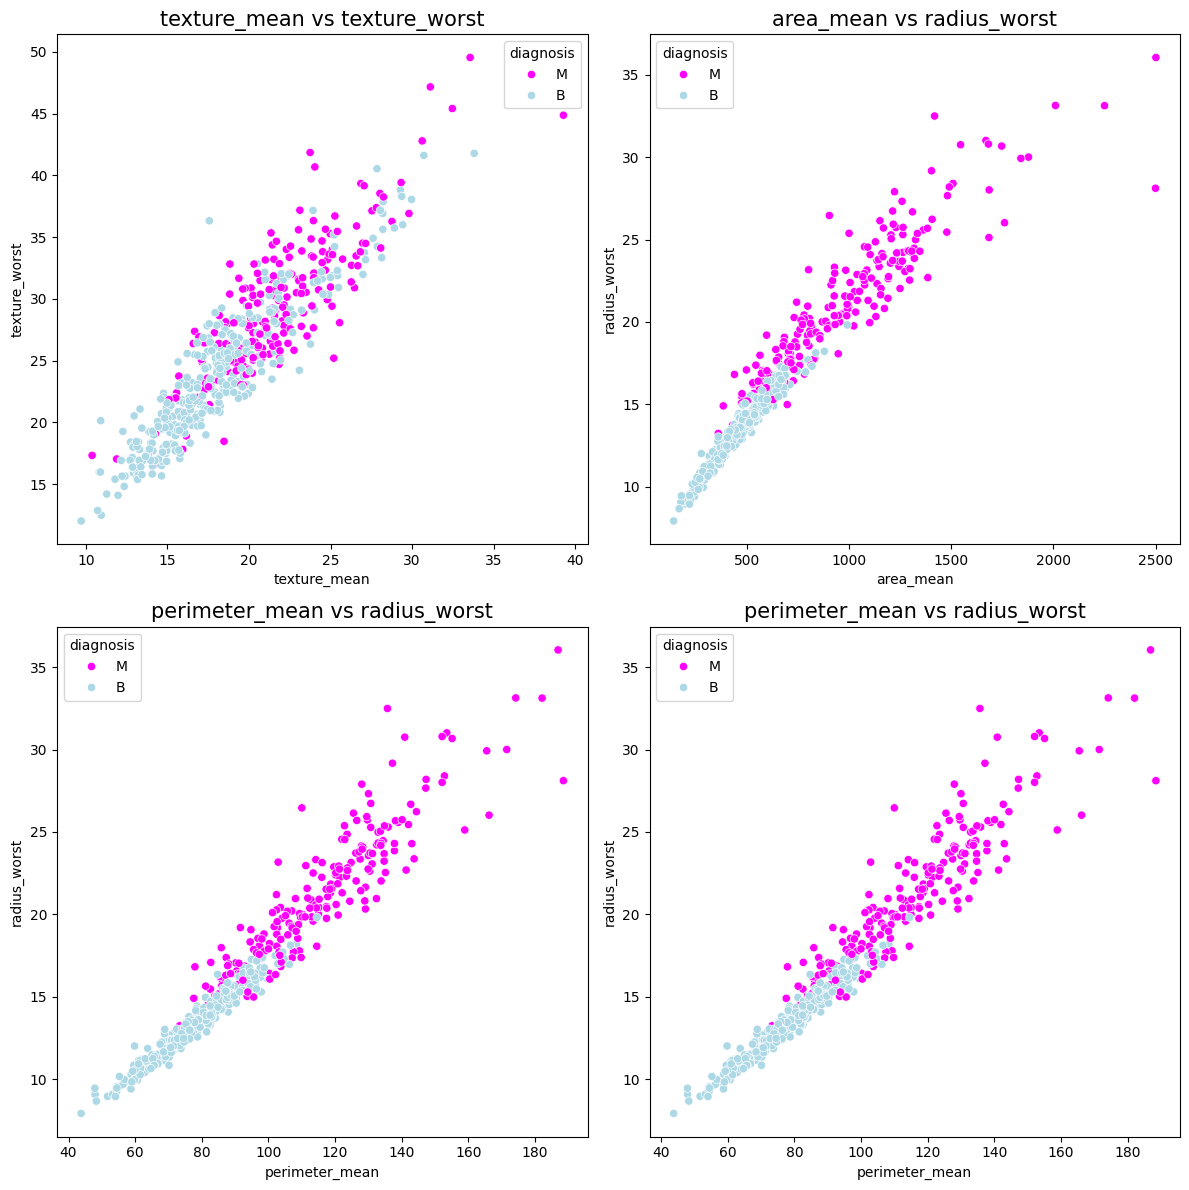

In [ ]:
palette = {'B': 'lightblue', 'M': 'magenta'}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Use subplots to manage layout

def plot_scatter(a, b, ax):
    sns.scatterplot(x=df[a], y=df[b], hue='diagnosis', data=df, palette=palette, ax=ax)
    ax.set_title(f'{a} vs {b}', fontsize=15)

plot_scatter('texture_mean', 'texture_worst', axes[0, 0])
plot_scatter('area_mean', 'radius_worst', axes[0, 1])
plot_scatter('perimeter_mean', 'radius_worst', axes[1, 0])
plot_scatter('perimeter_mean', 'radius_worst', axes[1, 1])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Show all the plots at once

Inverse correlated pairs

<Figure size 1200x1200 with 0 Axes>

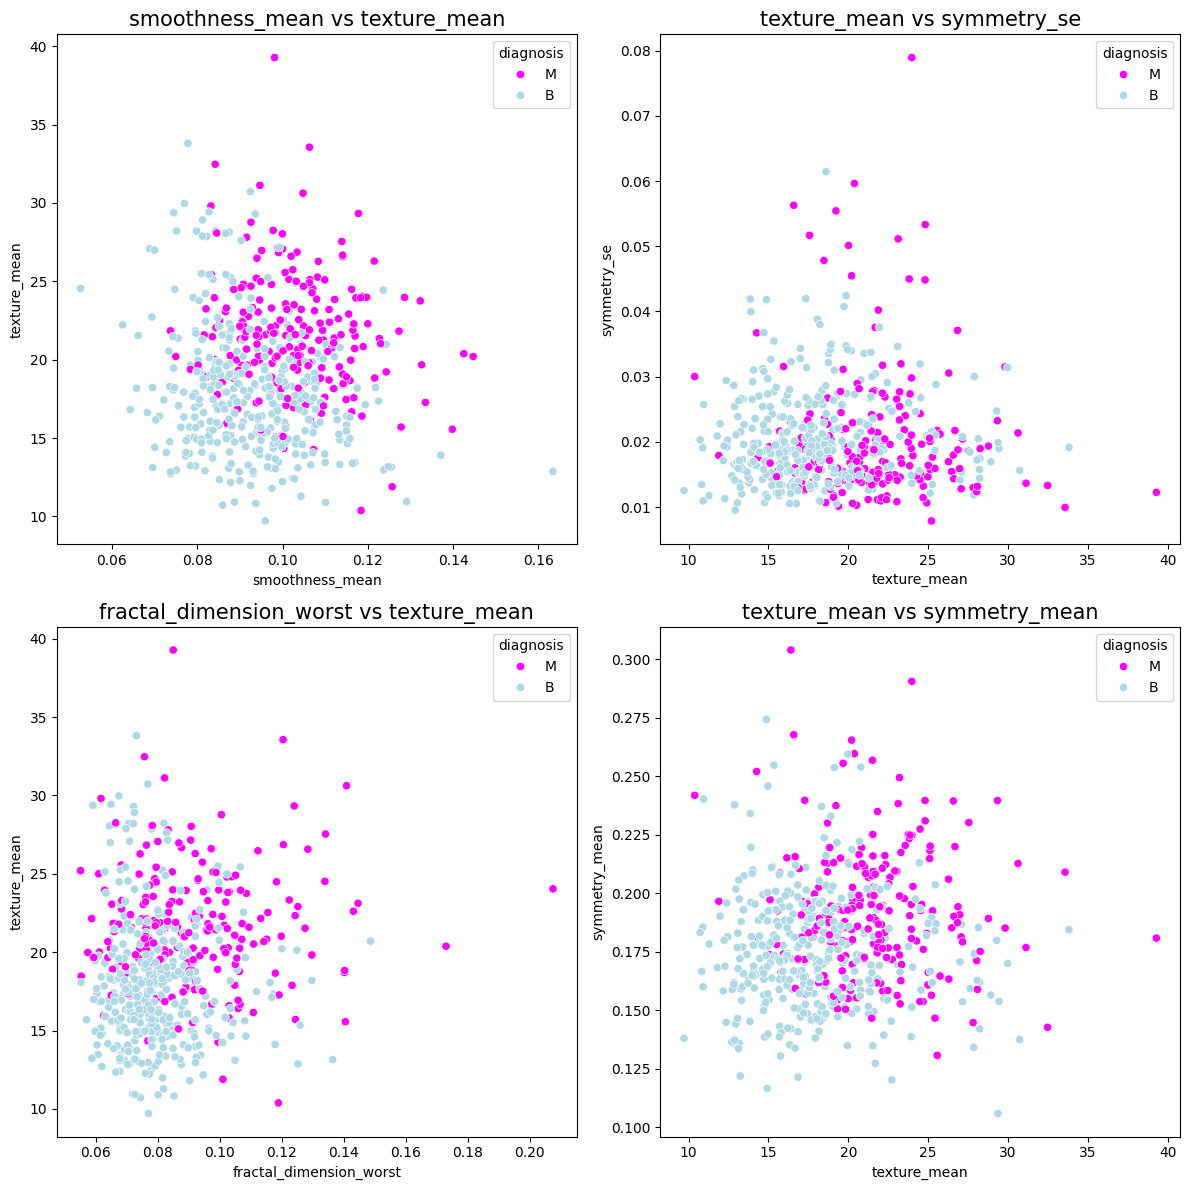

In [ ]:
fig = plt.figure(figsize=(12,12))


palette = {'B': 'lightblue', 'M': 'magenta'}

# Create a figure with subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Call the function with the appropriate subplots (axes)
plot_scatter('smoothness_mean', 'texture_mean', axes[0, 0])
plot_scatter('texture_mean', 'symmetry_se', axes[0, 1])
plot_scatter('fractal_dimension_worst', 'texture_mean', axes[1, 0])
plot_scatter('texture_mean', 'symmetry_mean', axes[1, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Show all plots
plt.show()

##Data Visualization

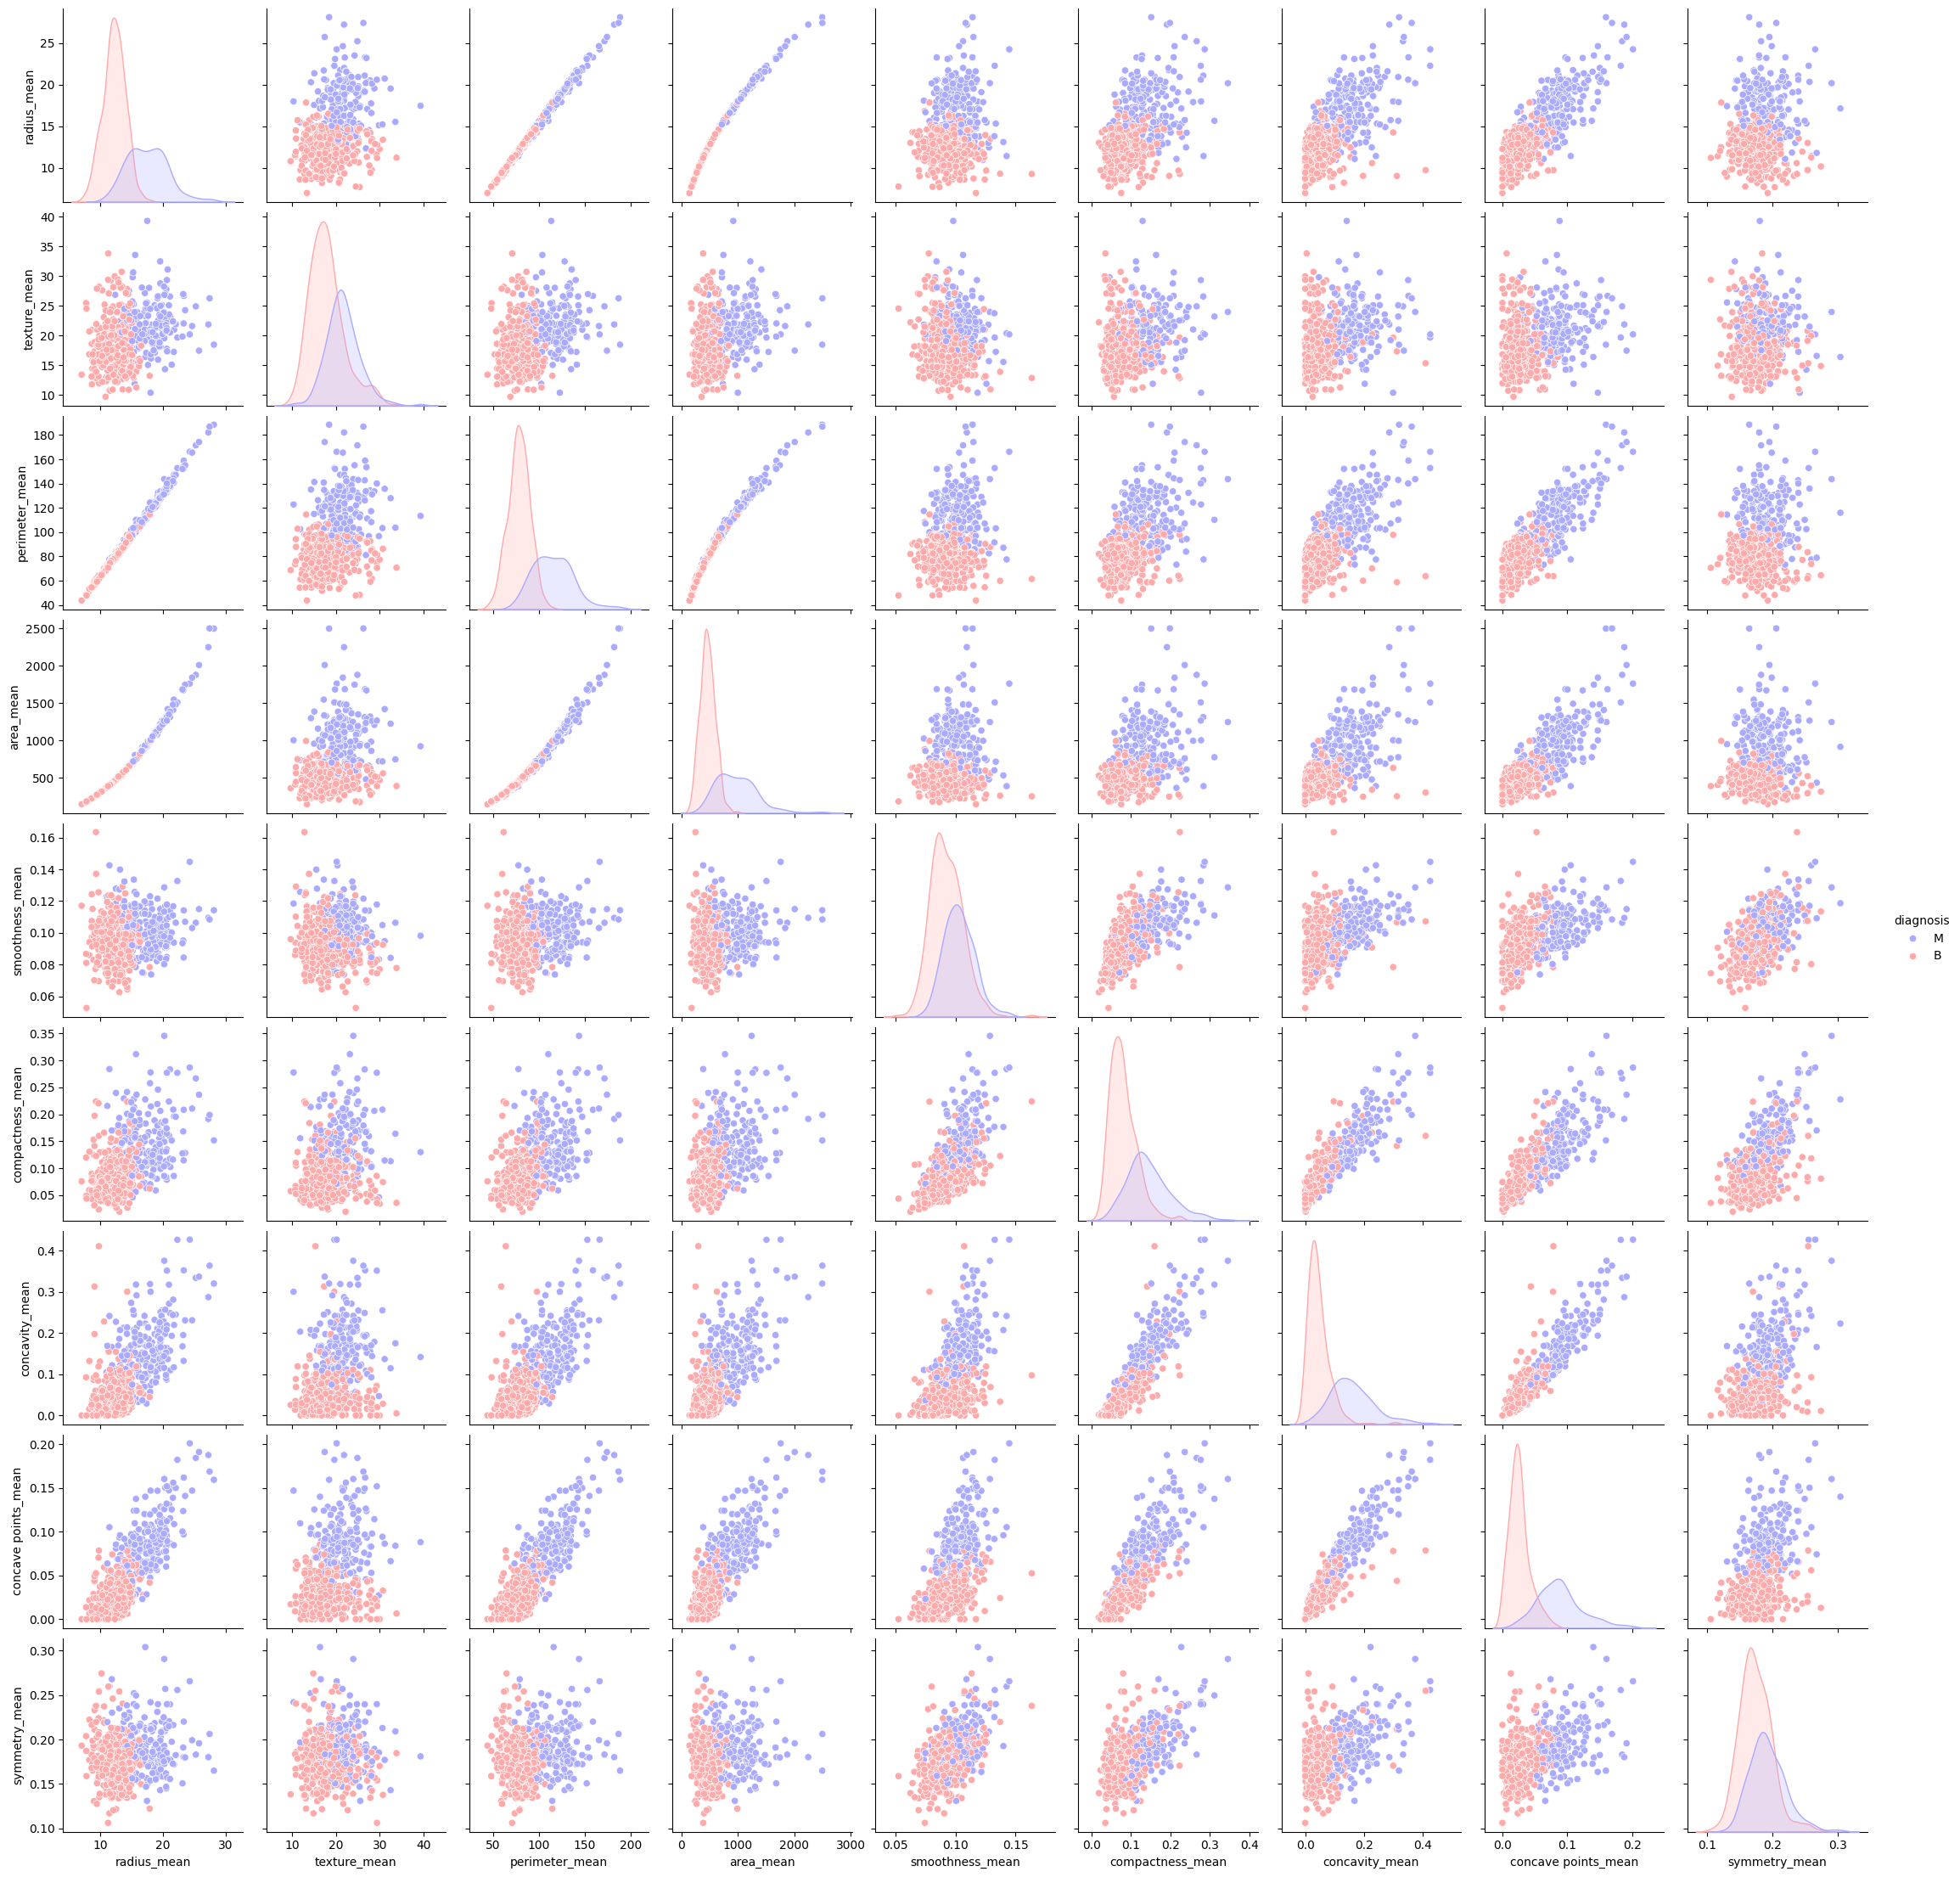

In [ ]:
#Correlation between all features
rcParams['figure.figsize'] = 8,5

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=df[cols],hue='diagnosis', palette='bwr')
plt.show()

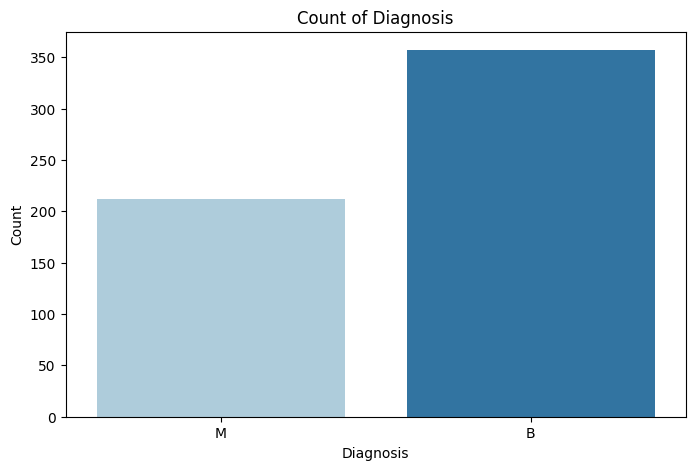

In [ ]:
#Target variable
sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='Paired', legend=False)
plt.title('Count of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Show the plot
plt.show()

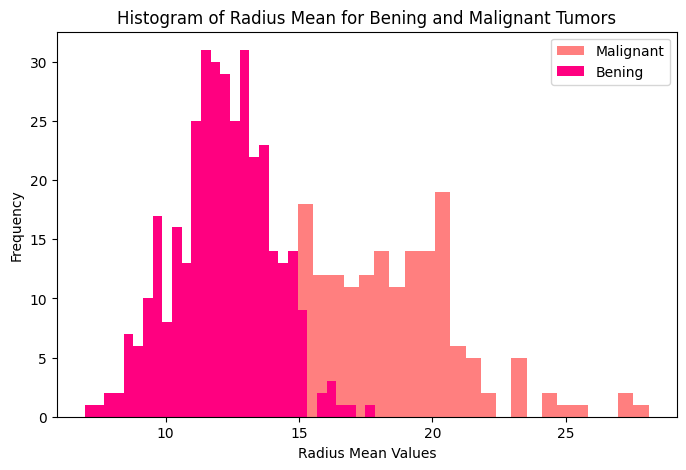

In [ ]:
#Histogram
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30, fc = (1,0,0.5), label= "Bening")

plt.legend()
plt.xlabel ("Radius Mean Values")
plt.ylabel ("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

##Preprocessing data

###Encoder categorical to numeric

As we know machine learning algorithms can only read numerical values. It is essential to encoding categorical features into numerical values.

In [ ]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
LEncoder = LabelEncoder()

df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])
print(df['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


So we have encoded malignan as 1 and benign as 0

In [ ]:
#Separating the independant and the dependant variable
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

###Splitting the dataset

In [ ]:
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

###Feature Scalling

Feature scaling is a method used to standardize the range of independent variables or features of data. Scaling the data is very important to boost the score.

Feature Scaling, is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range.

There are two ways for scaling the dataset:

* Standardization

* Min_Max Scaling

Standardization : it substract the mean value( so standardized values always have a zero mean), and then it divides by the standard deviation, this method doesn't have a specific range from 0 to 1, that may cause a problem for many algorithms like Neural Network often expect an input value ranging from 0 to 1.

Sckit-Learn provides a transformer caller StandardScaler. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

Min_Max : called also Normalization, is the simplest way to scaling data, values are shifted and rescaled again so that the end up ranging from 0 to 1. we do this by substraction the min value and dividing by the Max minus the Min.

Sckit-learn provides a transformer callec MinMaxScaler. It have a hyperparameter called "Feature Range" to specify the range that you want.

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

##Modeling

In [ ]:
# Logistic Regression

logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

In [ ]:
# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

In [ ]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

##Evaluation and comparison

In [ ]:
#Accuracy comparison
models = []

Z = [SVC() , LogisticRegression()]


X = ["SVC" , "LogisticRegression"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))

d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

Accuracy           Algorithm
0  0.982456                 SVC
1  0.973684  LogisticRegression

In [ ]:
# Classification report for SVM
print('SVM:')
print(classification_report(y_test, y_pred_svc, labels=[0, 1], target_names=["Benign", "Malignant"]))

# Classification report for Logistic Regression
print('Logistic Regression:')
print(classification_report(y_test, y_pred_logreg, labels=[0, 1], target_names=["Benign", "Malignant"]))


SVM:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Logistic Regression:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



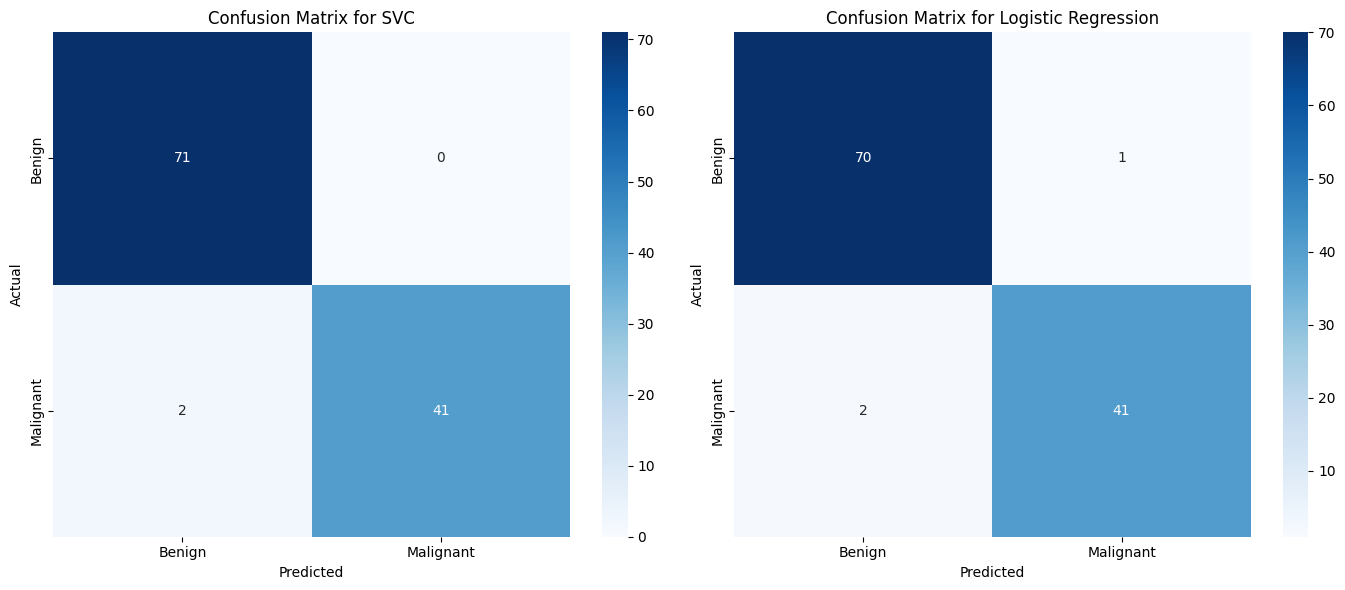

In [ ]:
# Compute confusion matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc, labels=[0 ,1])

# Compute confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=[0, 1])

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the confusion matrix for SVC
sns.heatmap(cm_svc, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"], ax=axes[0])
axes[0].set_title('Confusion Matrix for SVC')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the confusion matrix for Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"], ax=axes[1])
axes[1].set_title('Confusion Matrix for Logistic Regression')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

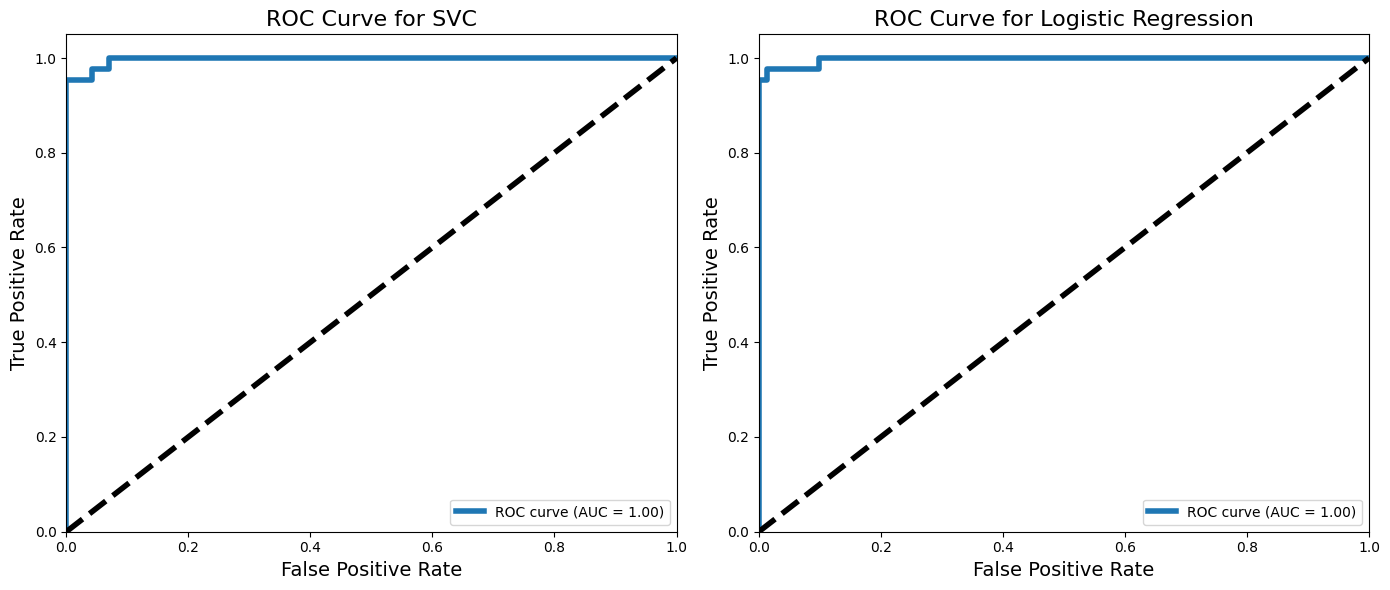

In [ ]:
# For SVC
y_score_svc = svc.decision_function(X_test)  # SVC decision function for ROC

# For Logistic Regression (using probabilities for ROC curve)
y_score_logreg = logreg.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and AUC for SVC
FPR_svc, TPR_svc, _ = roc_curve(y_test, y_score_svc)
ROC_AUC_svc = auc(FPR_svc, TPR_svc)

# Compute ROC curve and AUC for Logistic Regression
FPR_logreg, TPR_logreg, _ = roc_curve(y_test, y_score_logreg)
ROC_AUC_logreg = auc(FPR_logreg, TPR_logreg)

# Create a figure with subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot ROC curve for SVC
axes[0].plot(FPR_svc, TPR_svc, label=f'ROC curve (AUC = {ROC_AUC_svc:.2f})', linewidth=4)
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=4)  # Diagonal line (random classifier)
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate', fontsize=14)
axes[0].set_ylabel('True Positive Rate', fontsize=14)
axes[0].set_title('ROC Curve for SVC', fontsize=16)
axes[0].legend(loc="lower right")

# Plot ROC curve for Logistic Regression
axes[1].plot(FPR_logreg, TPR_logreg, label=f'ROC curve (AUC = {ROC_AUC_logreg:.2f})', linewidth=4)
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=4)  # Diagonal line (random classifier)
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=14)
axes[1].set_ylabel('True Positive Rate', fontsize=14)
axes[1].set_title('ROC Curve for Logistic Regression', fontsize=16)
axes[1].legend(loc="lower right")

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#Cancer Cells

In this project, we use SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

##Importing libraries

In [ ]:
#importing libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

##Look at the dataset

In [ ]:
#load dataset into pandas dataframe
cell_df = pd.read_csv("/content/SVM/cell-samples-uci-ml-repositor/cell_samples.csv")
cell_df.head()

ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

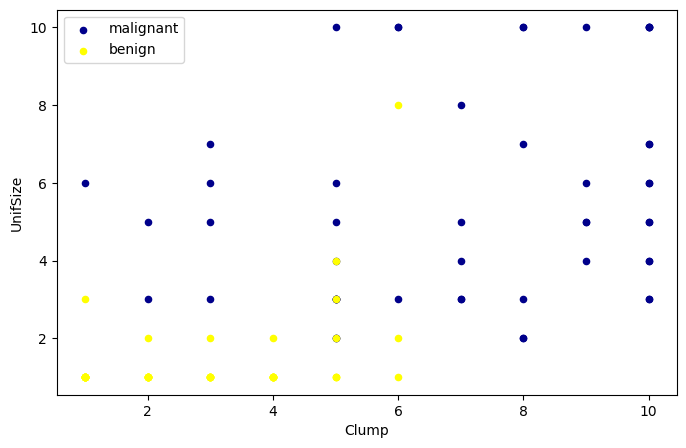

In [ ]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [ ]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

##Preprocessing data

In [ ]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-49-df8bc795062c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
#Defining our variables in x (features) and y (class prediction)
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])

In [ ]:
#Spliting data in train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


##Modeling

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [ ]:
# Define the kernels to compare
kernels = ['rbf', 'linear', 'poly', 'sigmoid']

# Create a dictionary to store results and models
models = {}
results = {}

# Train the models once
for kernel in kernels:
    # Initialize the SVM classifier with the current kernel
    if kernel == 'poly':
        clf = svm.SVC(kernel=kernel, degree=3, gamma='scale')  # Poly kernel with degree 3
    elif kernel == 'rbf':
        clf = svm.SVC(kernel=kernel, gamma='scale')  # RBF kernel with auto gamma
    else:
        clf = svm.SVC(kernel=kernel)  # Linear or Sigmoid kernels

    # Train the model
    clf.fit(X_train, y_train)

    # Store the trained model in the dictionary
    models[kernel] = clf

    # Make predictions
    yhat = clf.predict(X_test)

    # Calculate performance metrics
    f1 = f1_score(y_test, yhat, average='weighted')
    jaccard = jaccard_score(y_test, yhat, pos_label=2)

    # Store the results
    results[kernel] = {'F1 Score': f1, 'Jaccard Score': jaccard}

##Evaluation and comparison

In [ ]:
# Display the results
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"  Avg F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  Jaccard Score: {metrics['Jaccard Score']:.4f}")
    print("-" * 50)

Kernel: rbf
  Avg F1 Score: 0.9639
  Jaccard Score: 0.9444
--------------------------------------------------
Kernel: linear
  Avg F1 Score: 0.9639
  Jaccard Score: 0.9444
--------------------------------------------------
Kernel: poly
  Avg F1 Score: 0.9711
  Jaccard Score: 0.9556
--------------------------------------------------
Kernel: sigmoid
  Avg F1 Score: 0.3715
  Jaccard Score: 0.3942
--------------------------------------------------


In [ ]:
# Print the classification reports for each kernel (using pre-trained models)
for kernel in kernels:
    # Retrieve the pre-trained model from the dictionary
    clf = models[kernel]

    # Make predictions
    yhat = clf.predict(X_test)

    # Print the classification report, specifying custom labels for Benign (2) and Malignant (4)
    print(f"Classification Report for {kernel} Kernel:")
    print(classification_report(y_test, yhat, labels=[2, 4], target_names=["Benign", "Malignant"]))
    print("-" * 50)

Classification Report for rbf Kernel:
              precision    recall  f1-score   support

      Benign       1.00      0.94      0.97        90
   Malignant       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

--------------------------------------------------
Classification Report for linear Kernel:
              precision    recall  f1-score   support

      Benign       1.00      0.94      0.97        90
   Malignant       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

--------------------------------------------------
Classification Report for poly Kernel:
              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98        90
   Malignant     

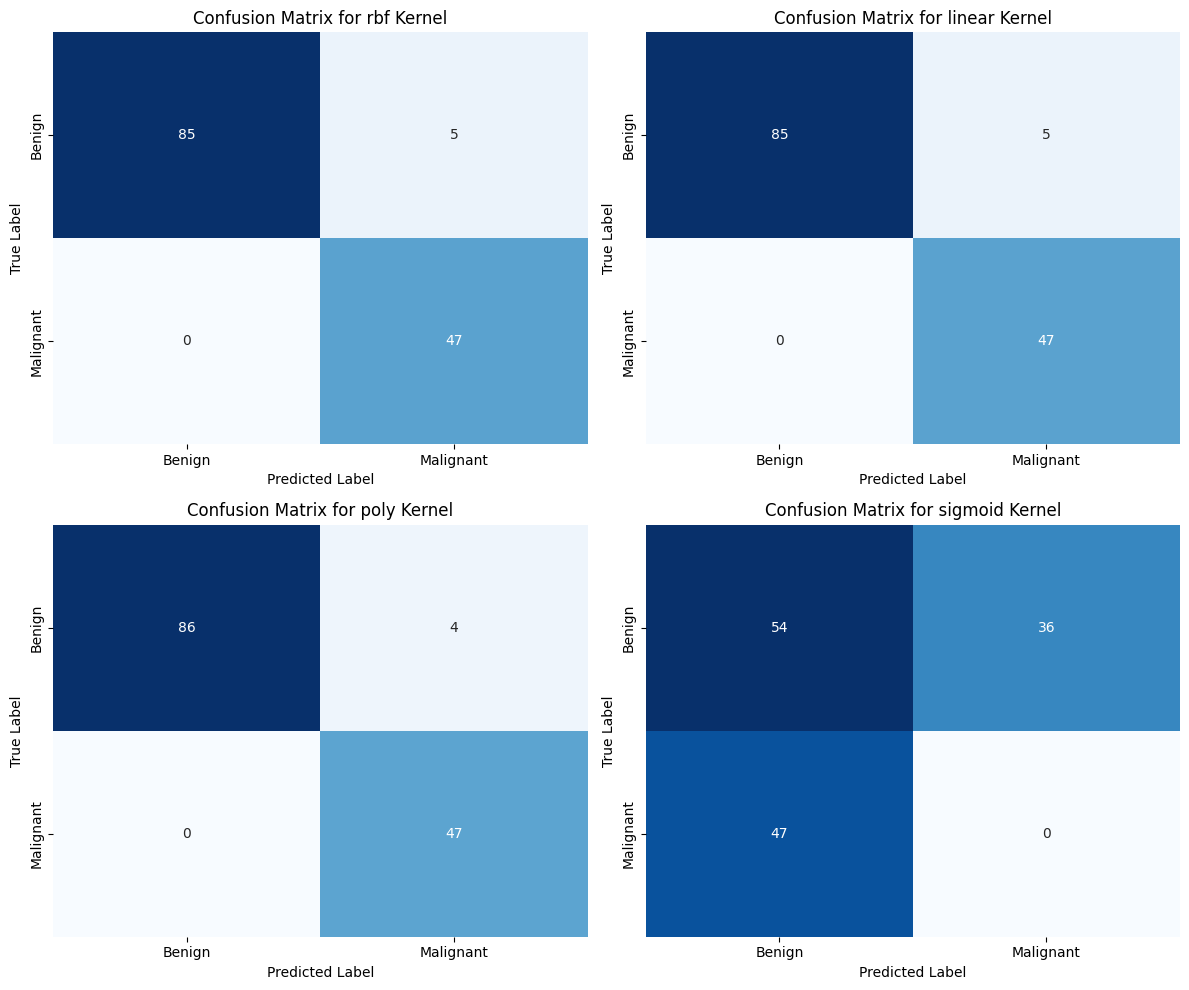

In [ ]:
# Plotting setup for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid for confusion matrix plots
axes = axes.flatten()  # Flatten to easily iterate over axes

# Plot the confusion matrix for each kernel (using pre-trained models)
for i, kernel in enumerate(kernels):
    # Retrieve the pre-trained model from the dictionary
    clf = models[kernel]

    # Make predictions
    yhat = clf.predict(X_test)

    # Compute the confusion matrix with custom labels for Benign (2) and Malignant (4)
    cm = confusion_matrix(y_test, yhat, labels=[2, 4])

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i],
                xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])

    axes[i].set_title(f'Confusion Matrix for {kernel} Kernel')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()

#MRI tumor classification

##Import libraries

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from os import listdir
from sklearn.utils import shuffle #shuffling the data improves the model
import imutils
import itertools
import plotly.graph_objs as go
from sklearn import svm, metrics, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm
from sklearn.metrics import roc_curve, roc_auc_score


In [3]:
!unzip /content/SVM/brain-mri-tumor-dataset/data.zip -d /content/SVM/brain-mri-tumor-dataset/

Archive:  /content/SVM/brain-mri-tumor-dataset/data.zip
   creating: /content/SVM/brain-mri-tumor-dataset/data/
   creating: /content/SVM/brain-mri-tumor-dataset/data/no/
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/1 no.jpeg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/10 no.jpg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/11 no.jpg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/12 no.jpg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/13 no.jpg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/14 no.jpg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/15 no.jpg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/17 no.jpg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/18 no.jpg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/19 no.jpg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/2 no.jpeg  
  inflating: /content/SVM/brain-mri-tumor-dataset/data/no/2

In [4]:
#set up the directory
image_dir="/content/SVM/brain-mri-tumor-dataset/data/"

##Preprocessing data

Function to load images from the directory and perform pre-processing, including:
* resizing to 240x240 mm
* normalizing the scale so that the intensity of the images is between 0 and 1 instead of 0 to 255 (grayscale)
* Turning the labels from categorical to numeric (without tumor = 0, with tumor = 1)

In [17]:
def load_data(dir_list, image_size=(240, 240)):  # Added image_size argument with default (224, 224)
    X = []
    y = []

    for directory in dir_list:
        for filename in listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            # Resize image to the standard size
            image = cv2.resize(image, image_size, interpolation=cv2.INTER_CUBIC)
            # Normalize the image (optional, for better performance with neural networks)
            image = image / 255.0
            X.append(image)

            # Append label: 1 for 'yes' folder, 0 for 'no' folder
            if directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])

    X = np.array(X)
    y = np.array(y)

    # Shuffle the data
    X, y = shuffle(X, y)

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')

    return X, y

Processing to crop the image as much as possible to remove the black background and leave only the brain.

In [16]:
def crop_brain_contour(image, plot=False, target_size=(240, 240)):
    # Ensure the image is in uint8 format
    if image.dtype != 'uint8':
        image = (image * 255).astype('uint8')

    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Use the grayscale image for Gaussian blur

    # Apply thresholding to get a binary image (single-channel)
    _, thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Ensure thresh is single-channel (grayscale) before passing to findContours
    if len(thresh.shape) == 3:
        thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

    # Find contours in thresholded image, then grab the largest one
    cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    # Crop new image out of the original image using the four extreme points (left, right, top, bottom)
    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)
        new_image = image[y:y+h, x:x+w]
        break

    # Resize the cropped image to the target size
    new_image_resized = cv2.resize(new_image, target_size)

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image_resized)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image_resized

def Croping_Data(train, target_size=(240, 240)):
    # Load all images in a directory
    X = []
    y = []

    for img in train:
        if img.dtype != 'uint8':
            img = (img * 255).astype('uint8')  # Convert to uint8 if not already
        image = crop_brain_contour(img, plot=False, target_size=target_size)
        X.append(image)

    X = np.array(X)

    return X

In [13]:
#function to split dataset in train, validation and test
def split_data(X, y, test_size=0.2):

    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

    return X_train, y_train, X_val, y_val, X_test, y_test

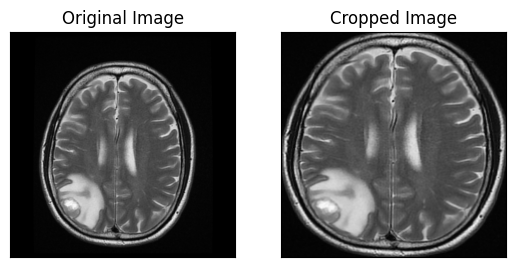

In [8]:
#Application in one image to test the crop function
ex_img = cv2.imread(image_dir+'yes/Y107.jpg')
ex_crop_img = crop_brain_contour(ex_img, True)

In [18]:
#load the data in the directory
X_train,y_train = load_data([image_dir+'yes', image_dir+'no'], image_size=(240, 240))

#preprocess the data
X = Croping_Data(X_train)
y = y_train

Number of examples is: 253
X shape is: (253, 240, 240, 3)
y shape is: (253, 1)


In [19]:
#Slip the dataset in train, validation and test
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

number of training examples = 177
number of validation examples = 38
number of test examples = 38
Training data and target sizes: 
(177, 240, 240, 3), (177, 1)
Test data and target sizes: 
(38, 240, 240, 3), (38, 1)


In [20]:
#Convert the images from 3D arrays (height, width, channels) to a 2D array
X_train = X_train.reshape(X_train.shape[0], 172800)
y_train = y_train.reshape(y_train.shape[0], )
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))

X_val = X_val.reshape(X_val.shape[0], 172800)
y_val = y_val.reshape(y_val.shape[0], )
print('Validation data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))

X_test = X_test.reshape(X_test.shape[0], 172800)
y_test = y_test.reshape(y_test.shape[0], )
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(177, 172800), (177,)
Validation data and target sizes: 
(177, 172800), (177,)
Test data and target sizes: 
(38, 172800), (38,)


In [21]:
#Visualize the dataset distribution
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

##Modeling

In [22]:
# Create a classifier: a support vector classifier
param_grid = [
  {'C': [1, 10], 'kernel': ['linear']},
 ]
svc = svm.SVC()
classifier = GridSearchCV(svc, param_grid, verbose = 3)
classifier.fit(X_train, y_train)
#fit to the training data

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.694 total time=   4.2s
[CV 2/5] END ................C=1, kernel=linear;, score=0.722 total time=   6.8s
[CV 3/5] END ................C=1, kernel=linear;, score=0.771 total time=   7.2s
[CV 4/5] END ................C=1, kernel=linear;, score=0.686 total time=   4.4s
[CV 5/5] END ................C=1, kernel=linear;, score=0.686 total time=   8.4s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.694 total time=   4.1s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.722 total time=   8.4s
[CV 3/5] END ...............C=10, kernel=linear;, score=0.771 total time=   4.4s
[CV 4/5] END ...............C=10, kernel=linear;, score=0.686 total time=   4.3s
[CV 5/5] END ...............C=10, kernel=linear;, score=0.686 total time=   7.4s


GridSearchCV(estimator=SVC(), param_grid=[{'C': [1, 10], 'kernel': ['linear']}],
             verbose=3)

In [23]:
# now to Now predict the value of the digit on the test data
y_pred = classifier.predict(X_test)

##Evaluation

In [24]:
print("Classification report for classifier:"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier GridSearchCV(estimator=SVC(), param_grid=[{'C': [1, 10], 'kernel': ['linear']}],
             verbose=3):
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.63      0.63      0.63        19

    accuracy                           0.63        38
   macro avg       0.63      0.63      0.63        38
weighted avg       0.63      0.63      0.63        38




Test Accuracy = 0.63


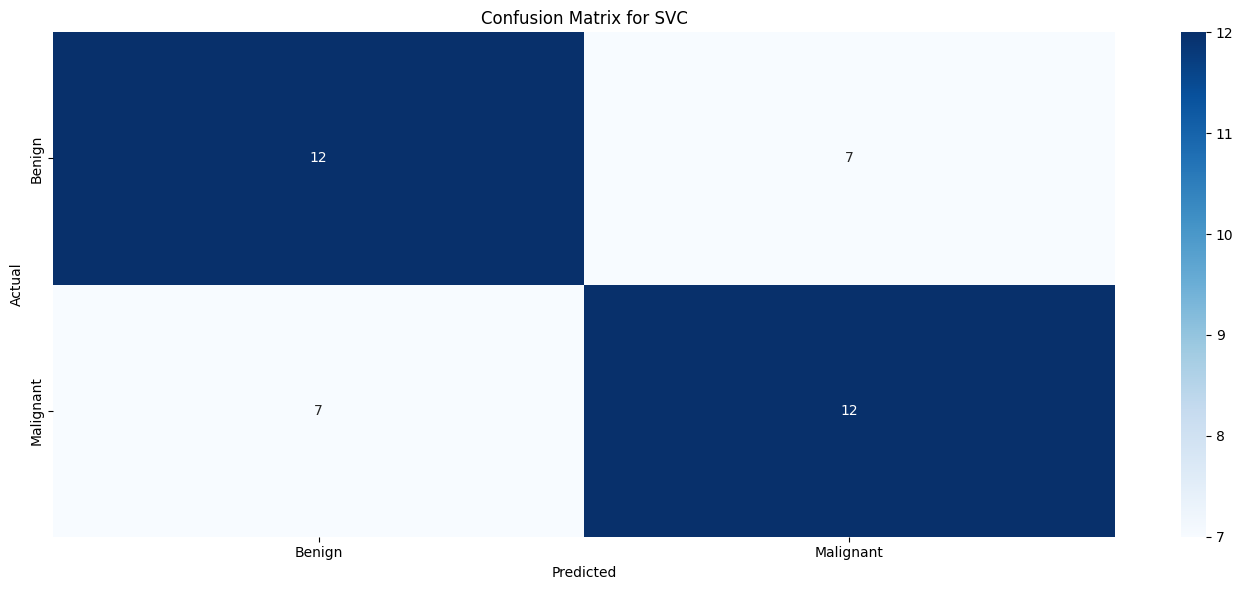

In [32]:
# validate on test set
predictions = classifier.predict(X_test)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions)
# Create a figure with subplots
fig, axes = plt.subplots(figsize=(14, 6))  # 1 row, 2 columns

# Plot the confusion matrix for SVC
sns.heatmap(confusion_mtx , annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
axes.set_title('Confusion Matrix for SVC')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

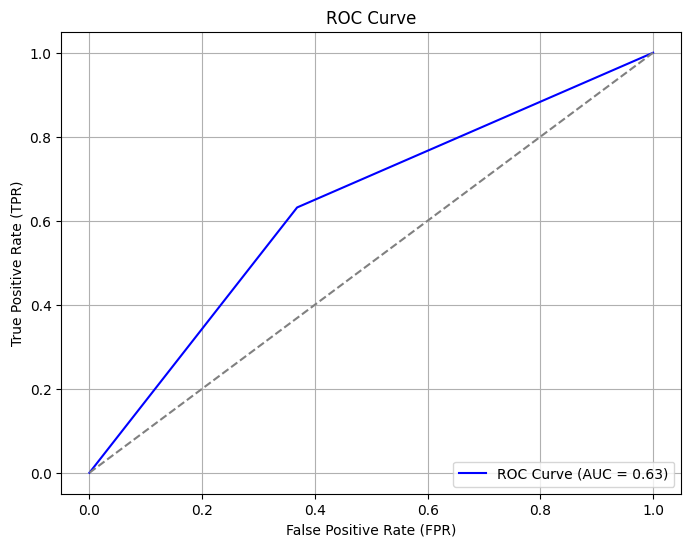

In [35]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate AUC
auc = roc_auc_score(y_test, predictions)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##Data Augmentation

Data augmentation is a technique used in image processing and machine learning to artificially increase the size of a dataset by applying various transformations to the existing images. These transformations create new, modified versions of the original images, helping the model generalize better and avoid overfitting. Common augmentation techniques include:

*   Rotation: Rotating images by a certain angle.
*   Flipping: Horizontally or vertically flipping images.
* Scaling: Changing the size of the image.
* Translation: Shifting the image in the x or y direction.
* Shearing: Distorting the image by shifting parts of the image along one axis.
* Zooming: Randomly zooming in or out of the image.
* Brightness/Contrast Adjustment: Modifying the brightness or contrast of the image.
* Noise Injection: Adding random noise to the image.
* Color Jittering: Randomly changing the color properties like saturation, hue, or brightness.

These transformations help the model become more robust by learning from a variety of image variations, even if the original dataset is relatively small.

####Augmentation

In [36]:
#Set up the directories to sava the augmentation data
os.makedirs('/content/SVM/brain-mri-tumor-dataset/working/augmented-images', exist_ok = True)
os.makedirs('/content/SVM/brain-mri-tumor-dataset/working/augmented-images/yes', exist_ok = True)
os.makedirs('/content/SVM/brain-mri-tumor-dataset/working/augmented-images/no', exist_ok = True)

augmented_data_path ='/content/SVM/brain-mri-tumor-dataset/working/augmented-images/'

augmented_yes =augmented_data_path+'yes'
augmented_no = augmented_data_path+'no'

IMG_SIZE = (240, 240)

In [37]:
#Augmentation function
def augment_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest'
                                 )

    for filename in listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        # reshape the image
        image = image.reshape((1,)+image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir,save_prefix=save_prefix, save_format='jpg'):
                i += 1
                if i > n_generated_samples:
                    break

In [43]:
#Aplication of the augmentation function
dir = os.listdir(augmented_yes)
if len(dir) == 0:

    # augment data for the examples with label equal to 'yes' representing tumurous examples
    augment_data(file_dir=image_dir+'yes',n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
    # augment data for the examples with label equal to 'no' representing non-tumurous examples
    augment_data(file_dir=image_dir+'no', n_generated_samples=9, save_to_dir=augmented_data_path+'no')
else:
    print(len(dir))

1084


In [42]:
X_train, y_train = load_data([augmented_yes, augmented_no])

Number of examples is: 2062
X shape is: (2062, 240, 240, 3)
y shape is: (2062, 1)


####Preprocessing the Data

In [ ]:
def plot_images(X, n_images=5):
    # Plot the first 'n_images' images in a grid
    plt.figure(figsize=(10, 10))

    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)  # Plot them in a row
        plt.imshow(X[i])
        plt.axis('off')  # Turn off axis
        plt.title(f"Image {i + 1}")  # Title for each subplot

    plt.show()

X shape: (2062, 240, 240, 3)
y shape: (2062, 1)


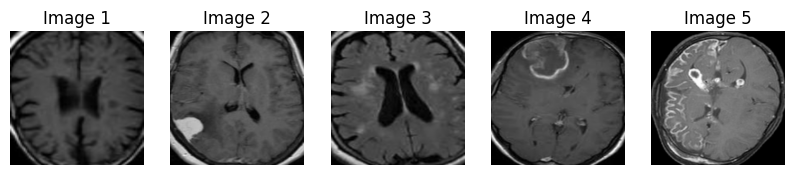

In [46]:
X = Croping_Data(X_train)
y = y_train

print("X shape:", X.shape)
print("y shape:", y.shape)

# Assuming X contains your images (after cropping and resizing)
plot_images(X, n_images=5)  # Change n_images to any number of images you'd like to visualize


In [47]:
#Split dataset
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

number of training examples = 1443
number of validation examples = 310
number of test examples = 309
Training data and target sizes: 
(1443, 240, 240, 3), (1443, 1)
Test data and target sizes: 
(309, 240, 240, 3), (309, 1)


In [48]:
#Transform 3D images to 2D arrays
X_train = X_train.reshape(X_train.shape[0], 172800)
y_train = y_train.reshape(y_train.shape[0], )
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))

X_val = X_val.reshape(X_val.shape[0], 172800)
y_val = y_val.reshape(y_val.shape[0], )
print('Validation data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))

X_test = X_test.reshape(X_test.shape[0], 172800)
y_test = y_test.reshape(y_test.shape[0], )
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1443, 172800), (1443,)
Validation data and target sizes: 
(1443, 172800), (1443,)
Test data and target sizes: 
(309, 172800), (309,)


In [49]:
#Data visualization
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)


####Modeling

In [50]:
# Create a classifier: a support vector classifier
param_grid = [
  {'C': [1, 10], 'kernel': ['linear']},
 ]
svc = svm.SVC()
classifier = GridSearchCV(svc, param_grid, verbose = 3)
classifier.fit(X_train, y_train)
#fit to the training data

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.682 total time= 7.7min
[CV 2/5] END ................C=1, kernel=linear;, score=0.689 total time= 5.3min
[CV 3/5] END ................C=1, kernel=linear;, score=0.730 total time= 5.4min
[CV 4/5] END ................C=1, kernel=linear;, score=0.729 total time= 5.5min
[CV 5/5] END ................C=1, kernel=linear;, score=0.705 total time= 5.5min
[CV 1/5] END ...............C=10, kernel=linear;, score=0.682 total time= 5.5min
[CV 2/5] END ...............C=10, kernel=linear;, score=0.689 total time= 5.5min
[CV 3/5] END ...............C=10, kernel=linear;, score=0.730 total time= 5.6min
[CV 4/5] END ...............C=10, kernel=linear;, score=0.729 total time= 5.5min
[CV 5/5] END ...............C=10, kernel=linear;, score=0.705 total time= 5.7min


GridSearchCV(estimator=SVC(), param_grid=[{'C': [1, 10], 'kernel': ['linear']}],
             verbose=3)

In [51]:
# now to Now predict the value of the digit on the test data
y_pred = classifier.predict(X_test)

####Evalutation

In [52]:
#Classification report
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier GridSearchCV(estimator=SVC(), param_grid=[{'C': [1, 10], 'kernel': ['linear']}],
             verbose=3):
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       154
           1       0.72      0.73      0.72       155

    accuracy                           0.72       309
   macro avg       0.72      0.72      0.72       309
weighted avg       0.72      0.72      0.72       309




Test Accuracy = 0.72


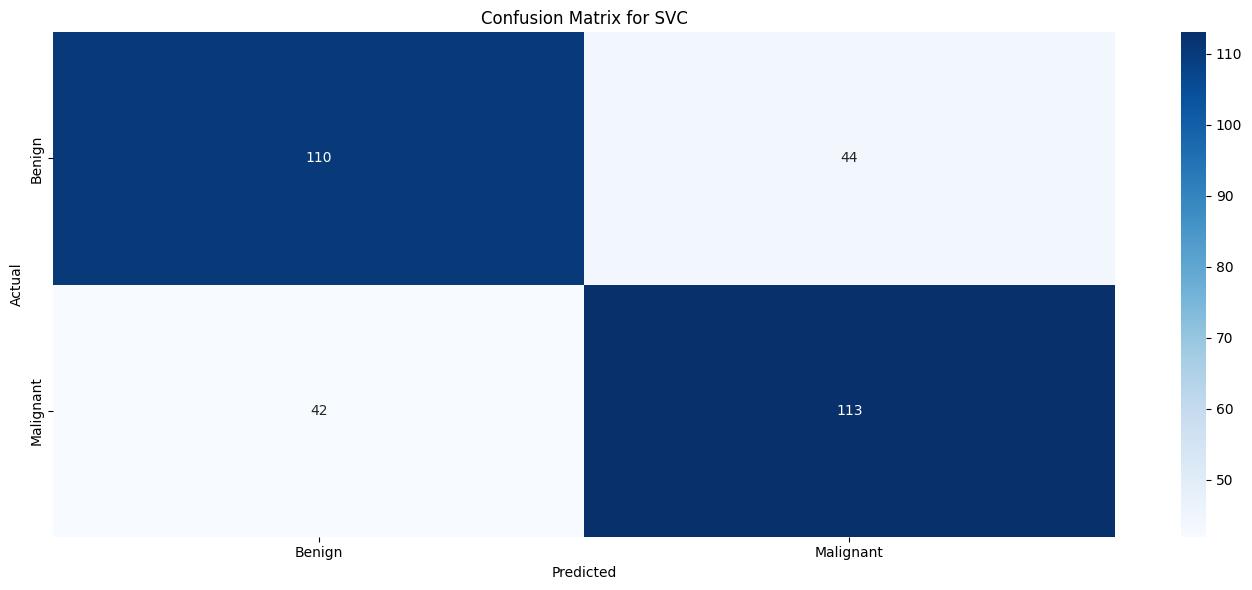

In [53]:
#Confusion matrix
predictions = classifier.predict(X_test)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions)
# Create a figure with subplots
fig, axes = plt.subplots(figsize=(14, 6))  # 1 row, 2 columns

# Plot the confusion matrix for SVC
sns.heatmap(confusion_mtx , annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
axes.set_title('Confusion Matrix for SVC')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

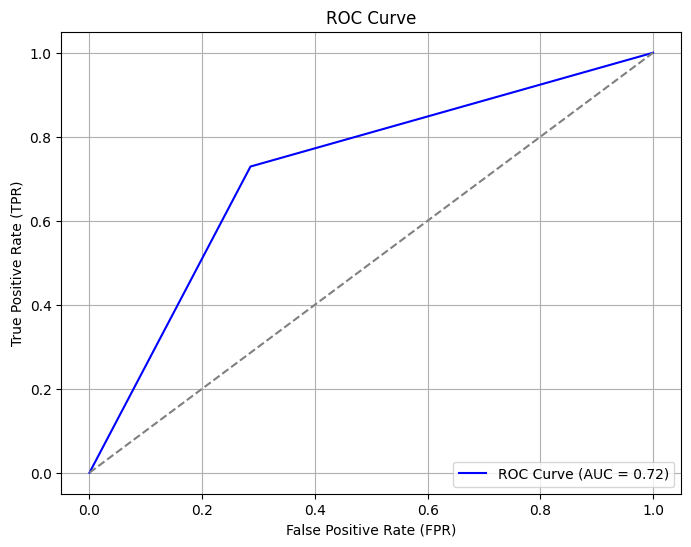

In [54]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate AUC
auc = roc_auc_score(y_test, predictions)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()